In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import re
import pytesseract
from datetime import datetime

pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"

today = datetime.today()

q
| : e 4) 3
MVM
Ail
| Br aera saree aT ATFH/ Name of Father / Legal Guardian VWVS518606
| MANORANJAN PANDA Poet od
| _arar-ar7H/ Nome of Mother |
| SABITA PANDA EE
| aft a7 asf #1 AFH/ Name of Spouse |
| cg
‘Tat / Address: mee:
L-1929,PHASE-2,DUMUDUMA oy
BHUBANESWAR BHUBANESWAR URBAN dl
PIN: 751019 ,ODISHA, INDIA ae
3 ors atte ond WA ft ed er/ Old Passport No. with Date and Place of isu tia
Vessel
a Fle ae
BH1064766257322
]



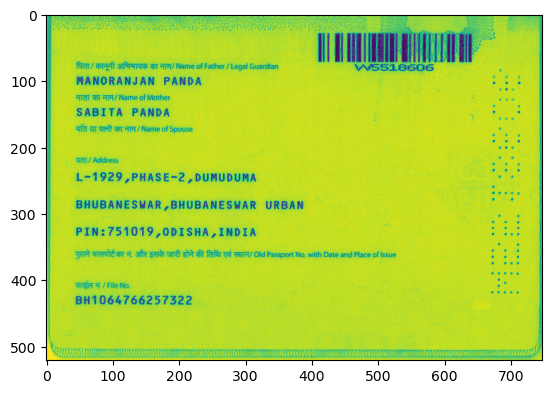

In [51]:
img = cv2.imread(
    "../assets/passport/Bhagabati prasad - Passport_page-0002.jpg"
)  # image to be aligned

# Convert images to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Gaussian blur
blur = cv2.GaussianBlur(gray, (3, 3), 0)
# Otsu's threshold
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Morph open to remove noise and invert image
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
invert = 255 - opening

selected_img = gray
data = pytesseract.image_to_string(selected_img, lang="eng", config="--psm 6")
plt.imshow(selected_img)
print(data)

text = data.replace("\n", " new_line ")

In [52]:
def extract_passport_back(text):
    # init variables
    splitted_text = []
    passport_no = None
    father_name = ''
    mother_name = ''
    address = ''
    pincode = None
    # variables for keeping index of values
    mother_name_index = None
    address_index = None
    pincode_index = None

    for txt in text.split("new_line"):
        txt = txt.strip()
        if txt:
            print(txt)
            splitted_text.append(txt)

    for current_index, data in enumerate(splitted_text):
        # if passport_no == None:
        #     passpost_no_match = re.search("[A-Z][0-9]{6}[1-9]", data)
        #     if passpost_no_match:
        #         passport_no_index = current_index
        #         passport_no = passpost_no_match.group(0)
        #     else:
        #         passpost_no_match2 = re.search("[A-Z][ ]{1}[0-9]{6}[1-9]", data)
        #         if passpost_no_match2:
        #             passport_no_index = current_index
        #             passport_no = passpost_no_match2.group(0)
        #             passport_no = "".join(passport_no.split(" "))
                    
        if not father_name:
            if 'Father' in data:
                father_name_line_splitted = splitted_text[current_index + 1].split(' ')
                for word in father_name_line_splitted:
                    father_name += ' ' +word if word.isupper() else ''

        if not mother_name:
            if 'Mother' in data:
                mother_name_index = current_index + 1
                mother_name_line_splitted = splitted_text[mother_name_index].split(' ')
                for word in mother_name_line_splitted:
                    mother_name += ' ' +word if word.isupper() else ''
        
        if pincode == None:
            if 'PIN' in data:
                pincode_match = re.search('[0-9]{6}', data)
                if pincode_match:
                    pincode_index = current_index
                    pincode = pincode_match.group(0)
        
        if address_index == None:
            if 'Address' in data:
                address_index = current_index + 1

    if not address and address_index and pincode_index:
        address_array = splitted_text[address_index:pincode_index + 1]
        for parts in address_array:
            parts_splitted = parts.split(' ')
            if 'PIN' in parts:
                continue
            for word in parts_splitted:
                address += ' ' + word if word.isupper() else ''


    output = {
        'passportNo': passport_no,
        'fatherName': father_name.strip(),
        'motherName': mother_name,
        'address': address,
        'pincode': pincode,
    }
    return output

extract_passport_back(text)

q
| : e 4) 3
MVM
Ail
| Br aera saree aT ATFH/ Name of Father / Legal Guardian VWVS518606
| MANORANJAN PANDA Poet od
| _arar-ar7H/ Nome of Mother |
| SABITA PANDA EE
| aft a7 asf #1 AFH/ Name of Spouse |
| cg
‘Tat / Address: mee:
L-1929,PHASE-2,DUMUDUMA oy
BHUBANESWAR BHUBANESWAR URBAN dl
PIN: 751019 ,ODISHA, INDIA ae
3 ors atte ond WA ft ed er/ Old Passport No. with Date and Place of isu tia
Vessel
a Fle ae
BH1064766257322
]


{'passportNo': None,
 'fatherName': 'MANORANJAN PANDA',
 'motherName': ' SABITA PANDA EE',
 'address': ' L-1929,PHASE-2,DUMUDUMA BHUBANESWAR BHUBANESWAR URBAN',
 'pincode': '751019'}